In [1]:
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/yuxinx2/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
reward_file = open('reward_records.txt','r')
rewards = reward_file.read().splitlines()
rewards = [float(item) for item in rewards]

step_file = open('step_records.txt','r')
steps = step_file.read().splitlines()
steps = [float(item) for item in steps]

In [3]:
mean_reward = [np.mean(rewards[max(i-100,0):i]) for i in range(1, len(rewards)+1)]
mean_step = [np.mean(steps[max(i-100,0):i]) for i in range(1, len(steps)+1)]

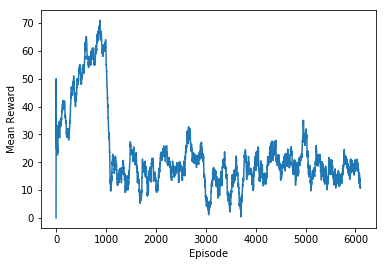

In [4]:
plt.plot(mean_reward)
plt.xlabel('Episode')
plt.ylabel('Mean Reward')
plt.savefig('Mean Reward.png', dpi=1000)

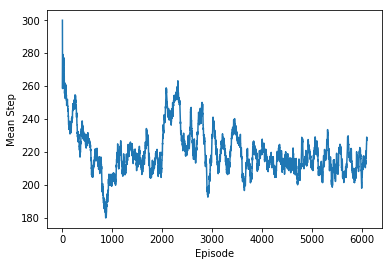

In [5]:
plt.plot(mean_step)
plt.xlabel('Episode')
plt.ylabel('Mean Step')
plt.savefig('Mean Step.png', dpi=1000)

In [4]:
mean_reward_holder = tf.placeholder(tf.float32, shape=(), name="mean_reward_100")
mean_step_holder = tf.placeholder(tf.float32, shape=(), name="mean_step_100")

tf.summary.scalar('mean_reward_100', mean_reward_holder)
tf.summary.scalar('mean_step_100', mean_step_holder)

writer = tf.summary.FileWriter('./logs')
merged_summary = tf.summary.merge_all()

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(2500, len(mean_reward)):
        feed_dict = { \
            mean_reward_holder : mean_reward[i], \
            mean_step_holder : mean_step[i]
        }
        summary = sess.run(merged_summary, feed_dict=feed_dict)
        writer.add_summary(summary, global_step=i)